# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image
import seaborn as sns
mpl.style.use('ggplot')
%matplotlib inline


filename = './../../assets/datasets/Sacramentorealestatetransactions.csv'

data = pd.read_csv(filename)

print data.dtypes
data.head()

## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

In [62]:
#sns.pairplot(data)
print data.describe()
cdf = data[data.sq__ft != 0][:]
cdf.head
print cdf.describe()


                zip        beds       baths       sq__ft          price  \
count    985.000000  985.000000  985.000000   985.000000     985.000000   
mean   95750.697462    2.911675    1.776650  1314.916751  234144.263959   
std       85.176072    1.307932    0.895371   853.048243  138365.839085   
min    95603.000000    0.000000    0.000000     0.000000    1551.000000   
25%    95660.000000    2.000000    1.000000   952.000000  145000.000000   
50%    95762.000000    3.000000    2.000000  1304.000000  213750.000000   
75%    95828.000000    4.000000    2.000000  1718.000000  300000.000000   
max    95864.000000    8.000000    5.000000  5822.000000  884790.000000   

         latitude   longitude  
count  985.000000  985.000000  
mean    38.607732 -121.355982  
std      0.145433    0.138278  
min     38.241514 -121.551704  
25%     38.482717 -121.446127  
50%     38.626582 -121.376220  
75%     38.695589 -121.295778  
max     39.020808 -120.597599  
              zip        beds       

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

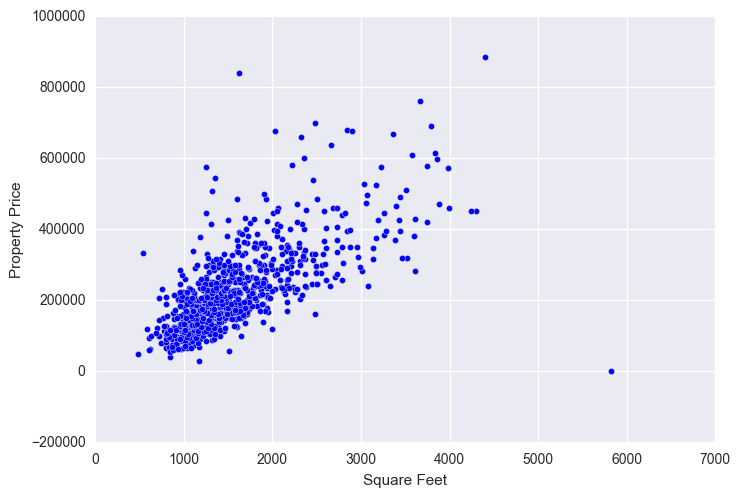

In [63]:
import seaborn as sns
from matplotlib import pyplot as plt

x = cdf['sq__ft']
y = cdf['price']

plt.scatter(x, y)
plt.xlabel("Square Feet")
plt.ylabel("Property Price")
plt.show()

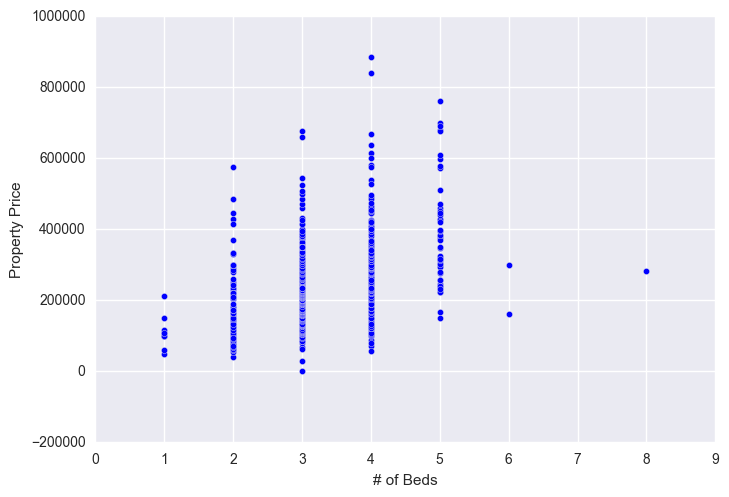

In [64]:
x = cdf['beds']
y = cdf['price']

plt.scatter(x, y)
plt.xlabel("# of Beds")
plt.ylabel("Property Price")
plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

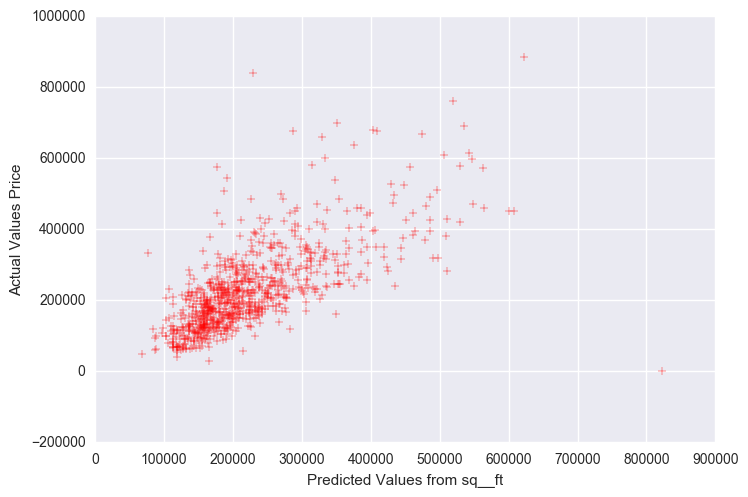

MSE: 7574596958.28


In [65]:
# Which combinations gives the best fit? The most correlated column is sq_ft after removing outliers/bad data. 
# The more variables you add like beds, longititude, and longitude the more correlation exists between the forecaseted price and actual price.
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

X = cdf["sq__ft"]
y = cdf["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from sq__ft")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

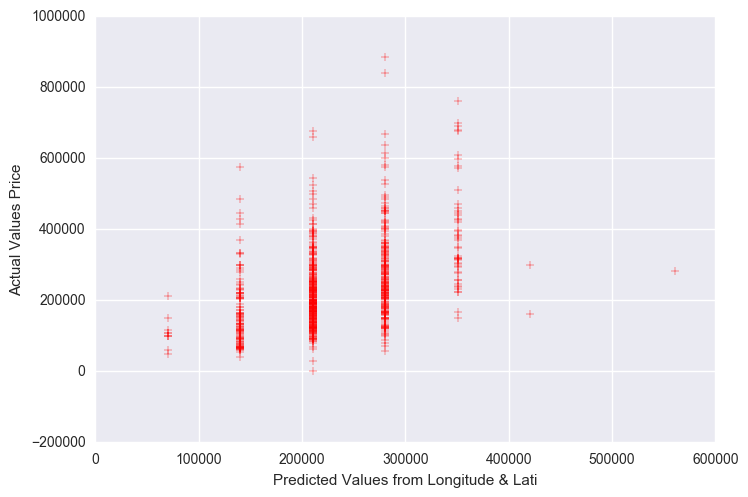

MSE: 11588876698.3


In [66]:
X = cdf["beds"]
y = cdf["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Longitude & Lati")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

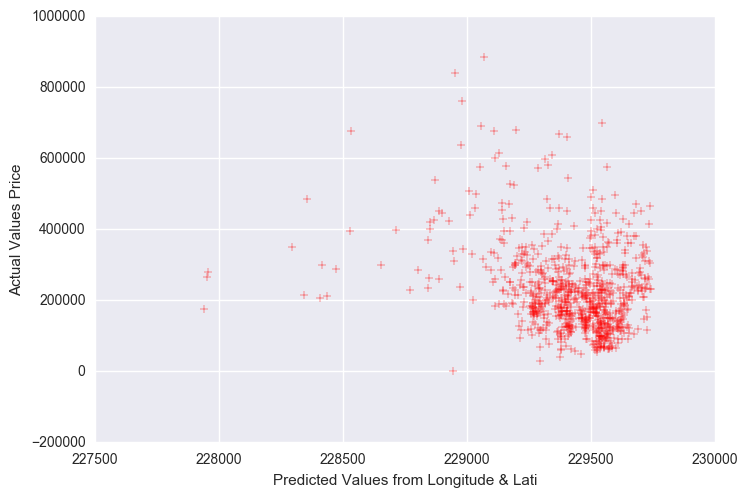

MSE: 14355657820.2


In [67]:
X = cdf["longitude"]
y = cdf["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Longitude & Lati")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

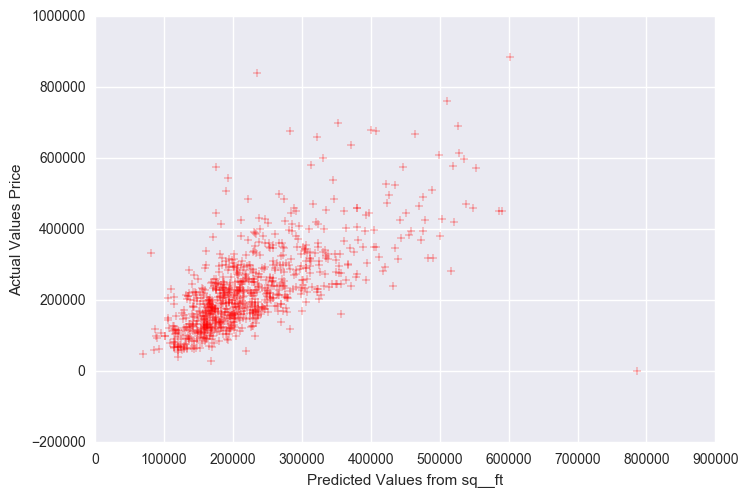

MSE: 7555995610.69


In [68]:
X = cdf[["sq__ft","beds"]]
y = cdf["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from sq__ft")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

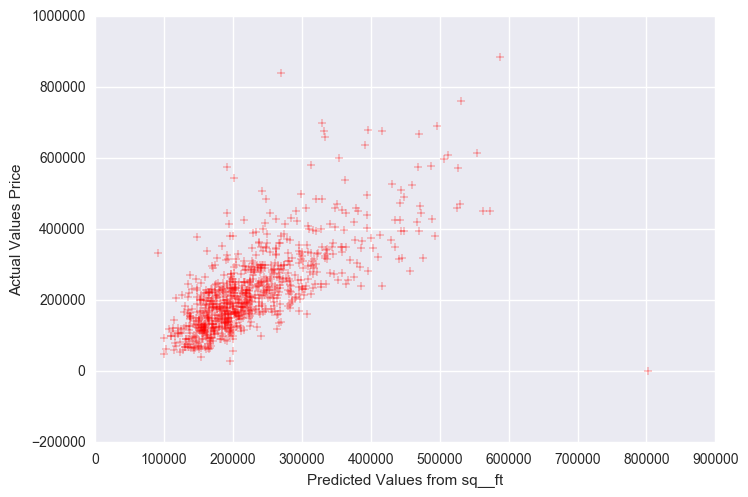

MSE: 7026728922.46


In [69]:
X = cdf[["sq__ft","beds","longitude","latitude"]]
y = cdf["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from sq__ft")
plt.ylabel("Actual Values Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [ ]:
These